In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

In [5]:
marks = pd.read_csv("./DataSets/marks.txt",header=None)
marks.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [6]:
marks.columns = ["exam1","exam2","pass"]
marks.head()

,exam1,exam2,pass
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [21]:
from sklearn.model_selection import train_test_split

X = marks[["exam1","exam2"]]
Y = marks[["pass"]]

In [42]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [43]:
len(X_train)

80

In [44]:
log_reg = LogisticRegression()
log_reg.fit(X_train,Y_train)

y_pred = log_reg.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [45]:
log_reg.coef_

array([[0.03032132, 0.03124498]])

In [46]:
log_reg.intercept_

array([-3.4294559])

In [47]:
from sklearn.metrics import accuracy_score

In [48]:
accuracy_score(Y_test,y_pred)

0.95

In [49]:
prob = log_reg.predict_proba(X_test)
prob

array([[0.40071976, 0.59928024],
       [0.42315594, 0.57684406],
       [0.51616621, 0.48383379],
       [0.51429434, 0.48570566],
       [0.13486256, 0.86513744],
       [0.18539035, 0.81460965],
       [0.42245172, 0.57754828],
       [0.33457637, 0.66542363],
       [0.58626863, 0.41373137],
       [0.35121868, 0.64878132],
       [0.62141171, 0.37858829],
       [0.65379385, 0.34620615],
       [0.56664833, 0.43335167],
       [0.15097318, 0.84902682],
       [0.4255642 , 0.5744358 ],
       [0.33036689, 0.66963311],
       [0.59162222, 0.40837778],
       [0.25192999, 0.74807001],
       [0.42114915, 0.57885085],
       [0.16667003, 0.83332997]])

In [50]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,y_pred)

array([[ 7,  1],
       [ 0, 12]], dtype=int64)

In [51]:
from sklearn import metrics

In [52]:
from sklearn.metrics import roc_curve
prob_pos = prob[:,1]

fpr, tpr, threshold = roc_curve(Y_test, prob_pos)

roc_auc = metrics.auc(fpr,tpr)

print(roc_auc)

0.9895833333333334


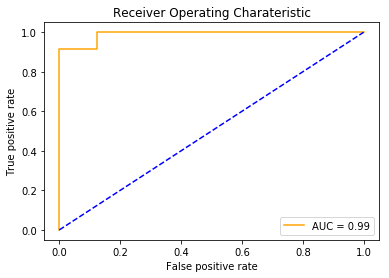

In [53]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.title("Receiver Operating Charateristic")
plt.plot(fpr, tpr,"orange", label="AUC = %0.2f"%roc_auc)
plt.legend(loc = "lower right")

plt.plot([0,1],[0,1], color = "b", linestyle="--")
plt.ylabel("True positive rate")
plt.xlabel("False positive rate")
plt.show()

In [58]:
adimited = marks[marks["pass"]==1]
not_adimited = marks[marks["pass"]==0]

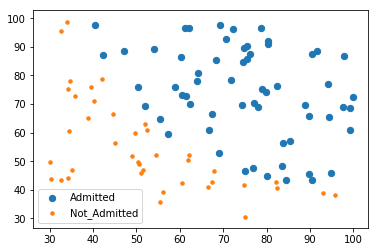

In [61]:
plt.scatter(adimited.iloc[:,0],adimited.iloc[:,1], s=40, label="Admitted")
plt.scatter(not_adimited.iloc[:,0],not_adimited.iloc[:,1], s=12, label="Not_Admitted")
plt.legend()
plt.show()

# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [70]:
from pydataset import data

cancer = data("cancer")
cancer.head()

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
1,3.0,306,2,74,1,1.0,90.0,100.0,1175.0,NaN
2,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0
3,3.0,1010,1,56,1,0.0,90.0,90.0,NaN,15.0
4,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0
5,1.0,883,2,60,1,0.0,100.0,90.0,NaN,0.0


In [71]:
from sklearn.datasets import load_breast_cancer

In [77]:
cancer = load_breast_cancer()
cancer_df = pd.DataFrame(cancer.data,columns=cancer.feature_names)
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [81]:
X_train,X_test,Y_train,Y_test = train_test_split(cancer_df,cancer.target,test_size=0.2,random_state=1)

In [82]:
log_regression = LogisticRegression()
log_regression.fit(X_train,Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [83]:
pred = log_regression.predict(X_test)

In [84]:
accuracy_score(Y_test,pred)

0.956140350877193

In [85]:
confusion_matrix(Y_test,pred)

array([[37,  5],
       [ 0, 72]], dtype=int64)

In [86]:
prob = log_regression.predict_proba(X_test)

In [95]:
from sklearn.metrics import roc_curve
prob_pos = prob[:,1]

fpr, tpr, threshold = roc_curve(Y_test, prob_pos)

roc_auc = metrics.auc(fpr,tpr)

print(roc_auc)

0.9894179894179894


In [89]:
threshold

array([1.99955705e+00, 9.99557055e-01, 9.74419393e-01, 9.67597660e-01,
       8.71523870e-01, 8.59772850e-01, 8.47200911e-01, 7.85187229e-01,
       6.08448587e-01, 5.35222886e-01, 5.31668709e-01, 1.11145931e-19])

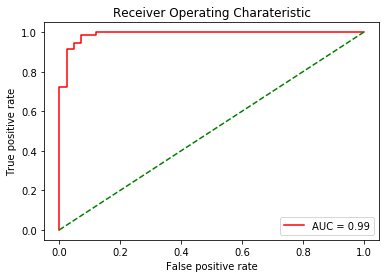

In [92]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.title("Receiver Operating Charateristic")
plt.plot(fpr, tpr,"red", label="AUC = %0.2f"%roc_auc)
plt.legend(loc = "lower right")

plt.plot([0,1],[0,1], color = "g", linestyle="--")
plt.ylabel("True positive rate")
plt.xlabel("False positive rate")
plt.show()